# IPL DATA ANALYSIS

# Name:Rushikesh Bharat Sonar

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
match=pd.read_csv('F:/sparx internship/Indian Premier League/matches.csv')
deli=pd.read_csv('F:/sparx internship/Indian Premier League/deliveries.csv')

In [3]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deli.shape

(179078, 21)

In [8]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
#No of season in dataset

In [10]:
len(match['season'].unique())

12

In [11]:
#No of teams played in ipl
len(match['team1'].unique())

15

In [12]:
print(match['team1'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


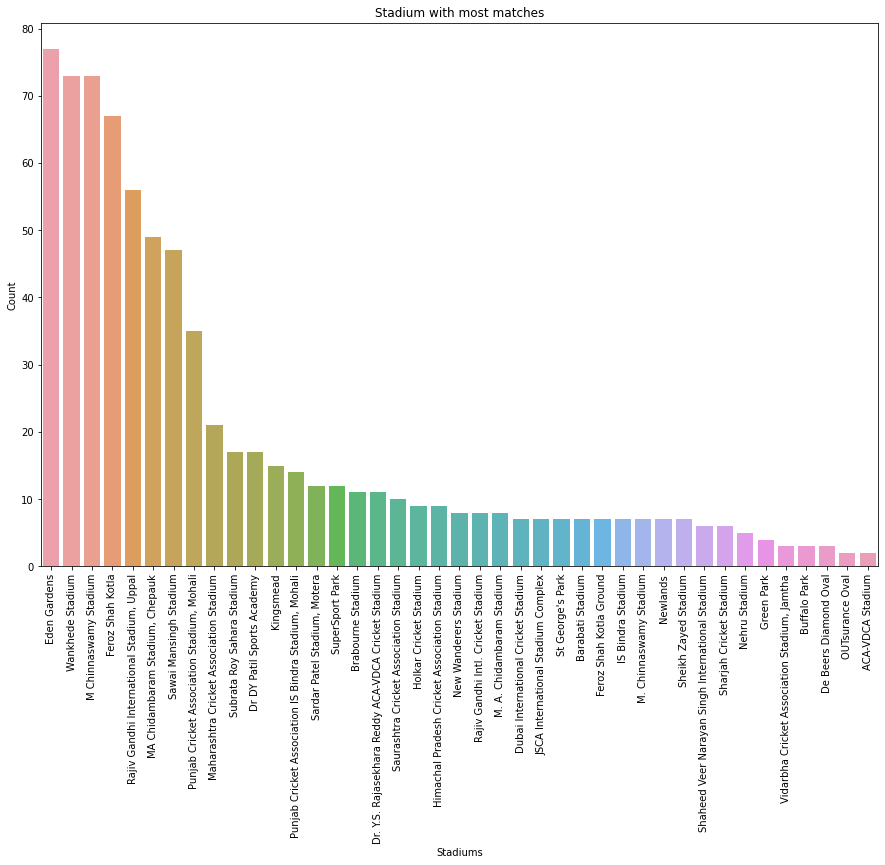

In [13]:
#Stadium with most number of matches
ls=match['venue'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,10))
temp=sns.barplot(ls.index, ls.values, alpha=0.9)
plt.title('Stadium with most matches')
plt.ylabel('Count')
plt.xlabel('Stadiums')
plt.xticks(rotation=90)
plt.show()


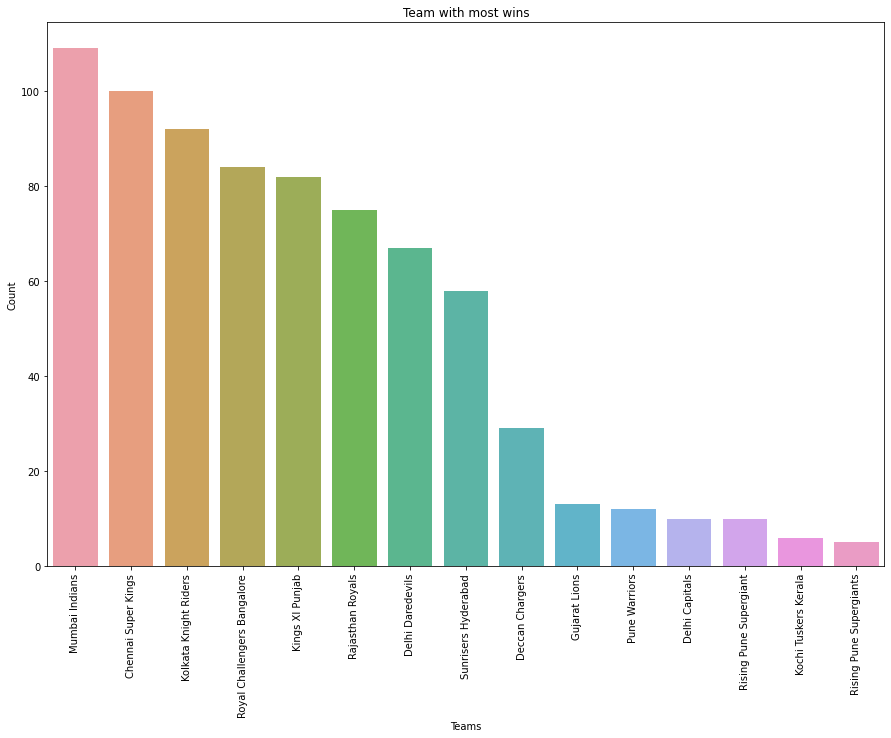

In [14]:
#Teams with most wins of matches
ls=match['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,10))
temp=sns.barplot(ls.index, ls.values, alpha=0.9)
plt.title('Team with most wins')
plt.ylabel('Count')
plt.xlabel('Teams')
plt.xticks(rotation=90)
plt.show()

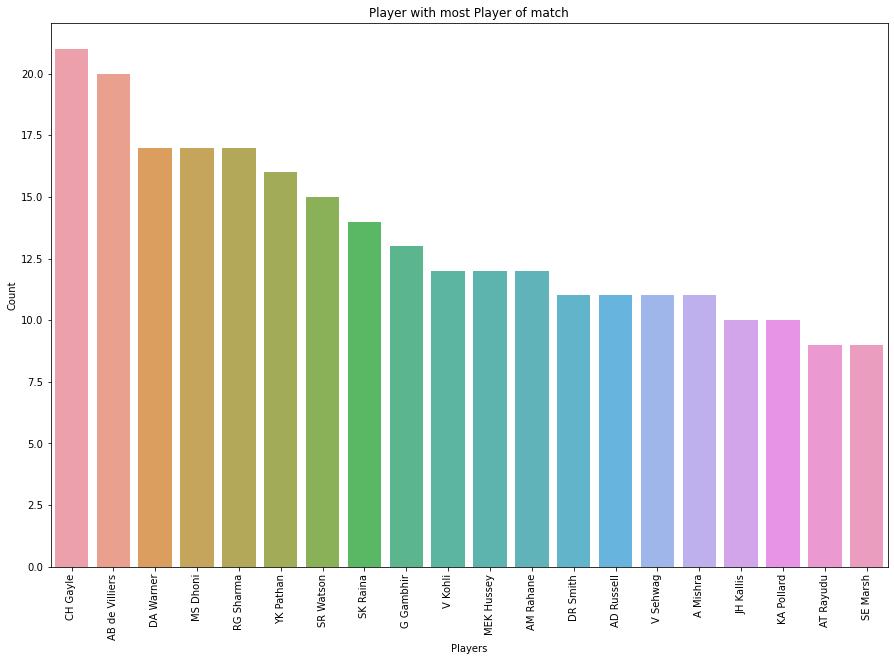

In [15]:
#Player with most player of the match award
ls=match['player_of_match'].value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(15,10))
temp=sns.barplot(ls.index, ls.values, alpha=0.9)
plt.title('Player with most Player of match')
plt.ylabel('Count')
plt.xlabel('Players')
plt.xticks(rotation=90)
plt.show()

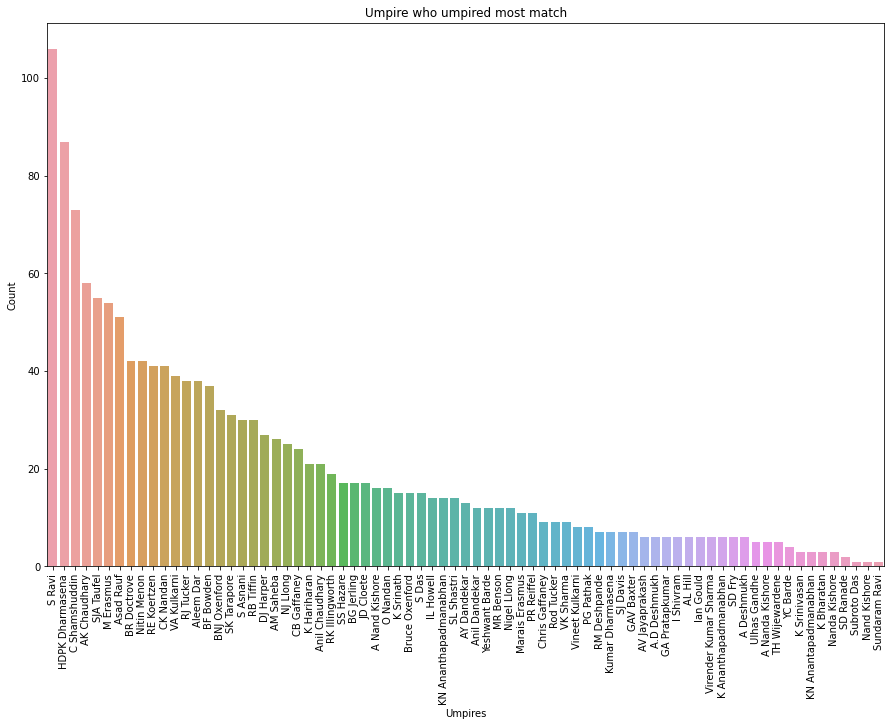

In [56]:
#Umpire who umpired for most matches
ls=pd.concat([match['umpire1'],match['umpire2']]).value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,10))
temp=sns.barplot(ls.index, ls.values, alpha=0.9)
plt.title('Umpire who umpired most match')
plt.ylabel('Count')
plt.xlabel('Umpires')
plt.xticks(rotation=90)
plt.show()

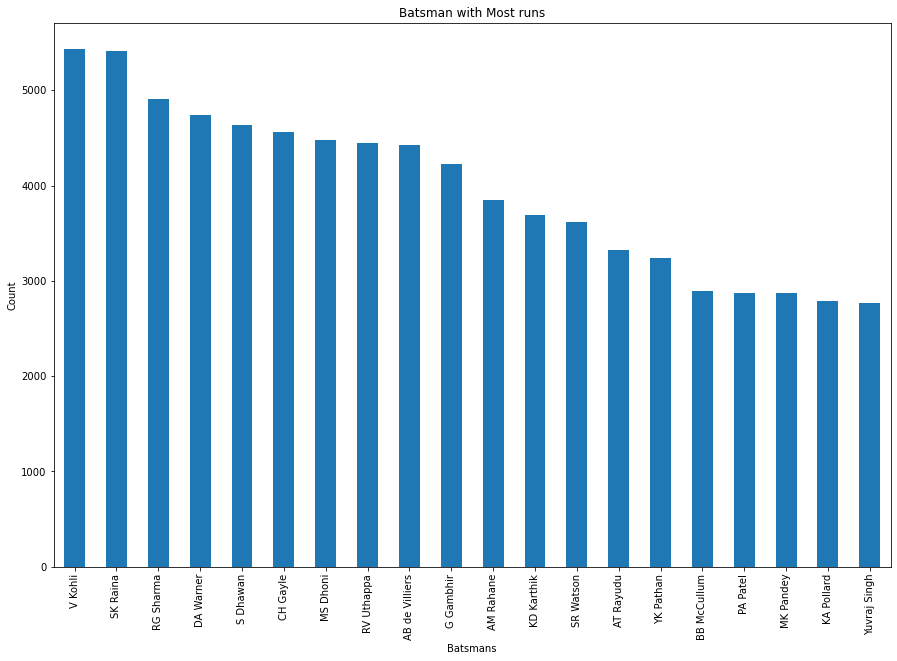

In [16]:
#Batsman with most runs
plt.figure(figsize=(15,10))
deli.groupby(['batsman']).batsman_runs.sum().sort_values(ascending=False)[:20].plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Batsmans')
plt.title('Batsman with Most runs')
plt.xticks(rotation=90)
plt.show()

In [17]:
#Batsman with most runs in single match

deli.groupby(['match_id','batsman','batting_team','bowling_team'])["batsman_runs"].sum().sort_values(ascending=False)[:20]


match_id  batsman         batting_team                 bowling_team               
411       CH Gayle        Royal Challengers Bangalore  Pune Warriors                  175
60        BB McCullum     Kolkata Knight Riders        Royal Challengers Bangalore    158
562       AB de Villiers  Royal Challengers Bangalore  Mumbai Indians                 133
7935      RR Pant         Delhi Daredevils             Sunrisers Hyderabad            130
620       AB de Villiers  Royal Challengers Bangalore  Gujarat Lions                  129
372       CH Gayle        Royal Challengers Bangalore  Delhi Daredevils               128
206       M Vijay         Chennai Super Kings          Rajasthan Royals               127
36        DA Warner       Sunrisers Hyderabad          Kolkata Knight Riders          126
516       V Sehwag        Kings XI Punjab              Chennai Super Kings            122
7953      SR Watson       Chennai Super Kings          Sunrisers Hyderabad            121
243       PC Valt

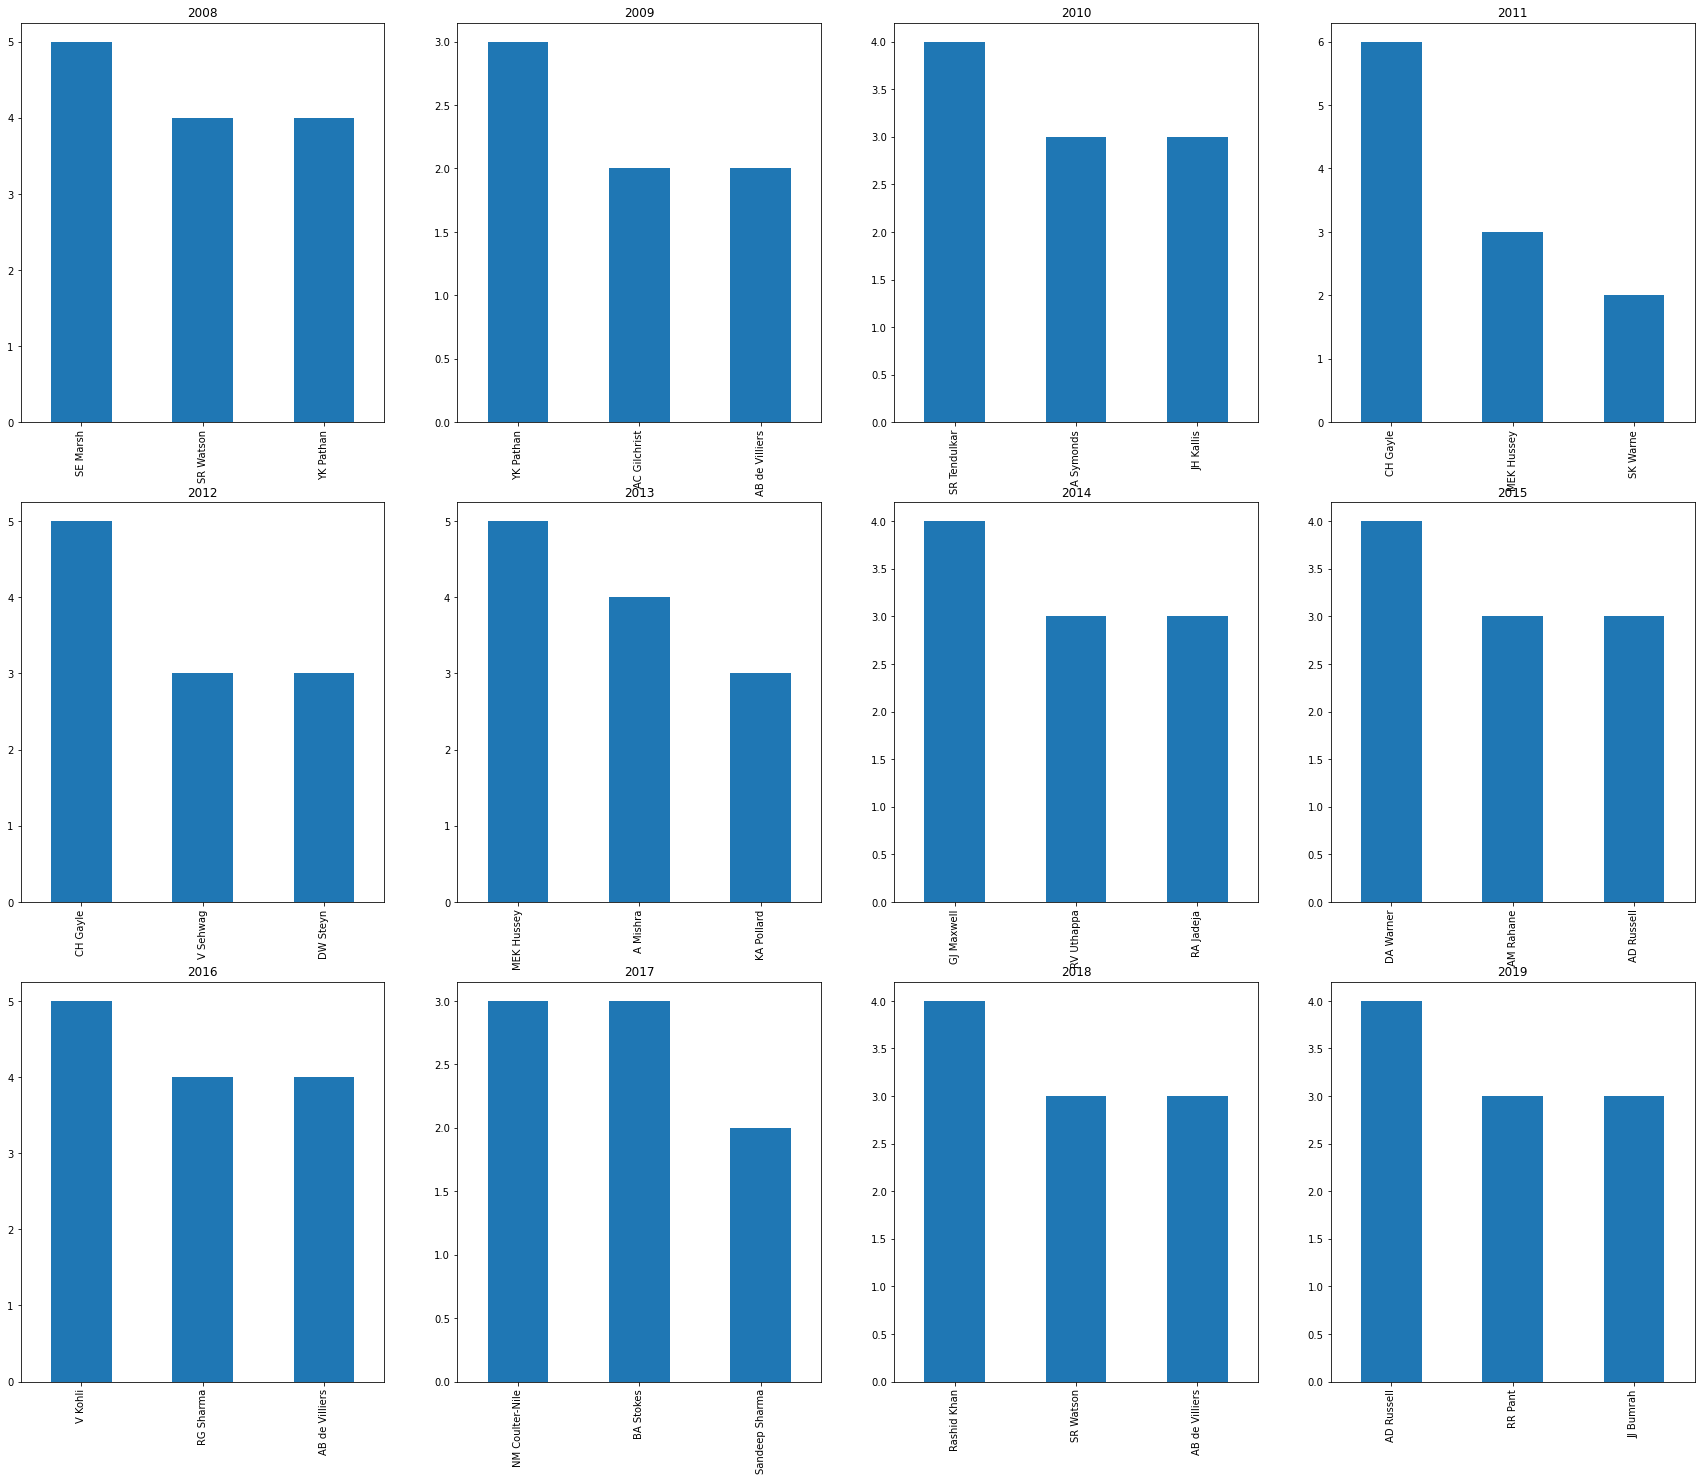

In [18]:
#top 3 players from each season
plt.figure(figsize=[30,25])
plt.title('Top 5 Player of Season')
season1=2008;
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.title(season1)
    match[match.season == season1 ].player_of_match.value_counts()[:3].plot(kind='bar')
    plt.xticks(rotation=90)
    season1 = season1+1
plt.show;    

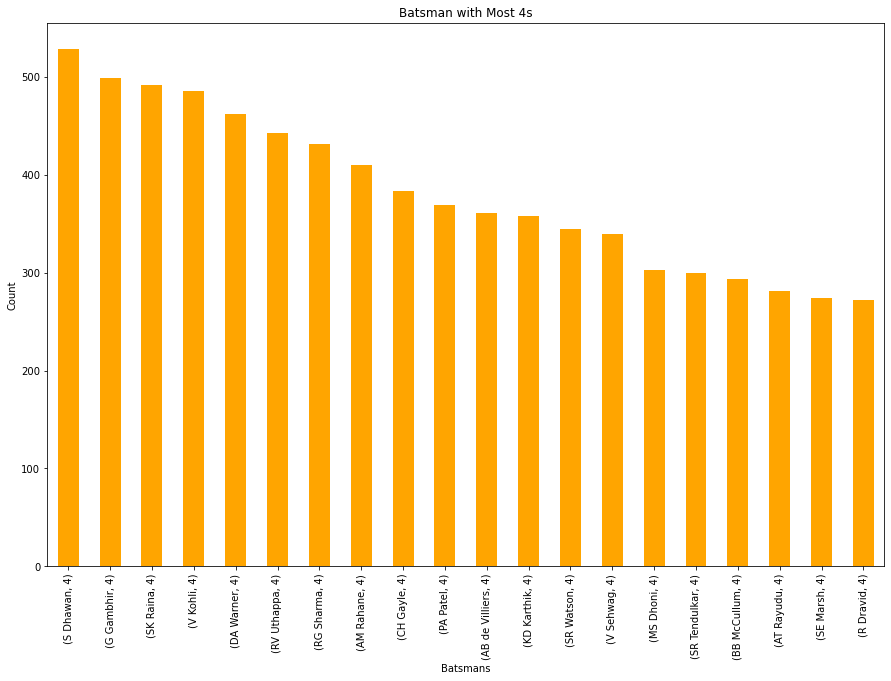

In [113]:
#most number of sixes
plt.figure(figsize=(15,10))
four=deli[deli.total_runs==4].groupby('batsman')
four.total_runs.value_counts().sort_values(ascending=False)[:20].plot(kind='bar',color='orange')
plt.ylabel('Count')
plt.xlabel('Batsmans')
plt.title('Batsman with Most 4s')
plt.xticks(rotation=90)
plt.show()

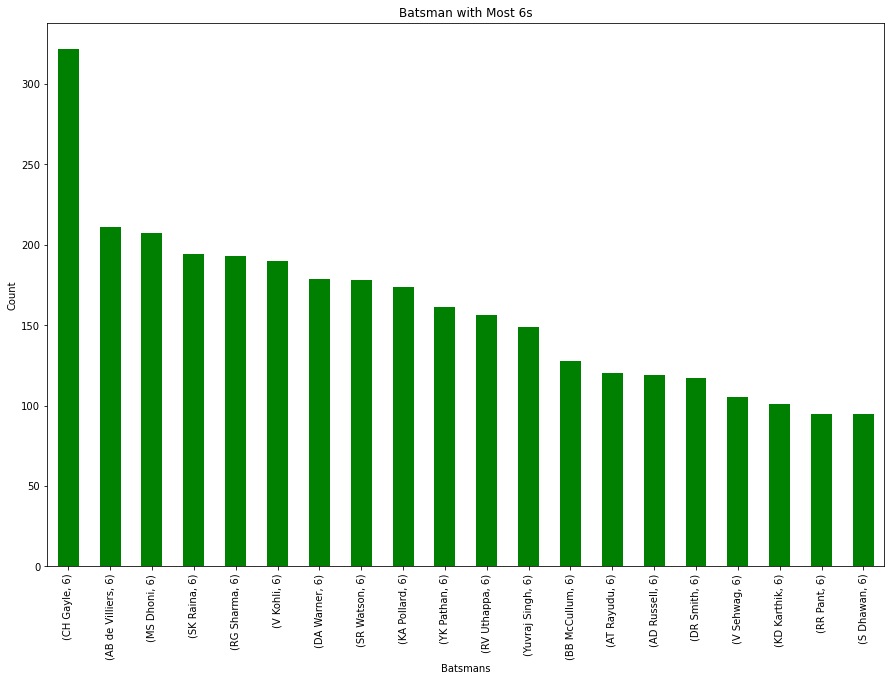

In [57]:
#most number of sixes
plt.figure(figsize=(15,10))
six=deli[deli.total_runs==6].groupby('batsman')
six.total_runs.value_counts().sort_values(ascending=False)[:20].plot(kind='bar',color='green')
plt.ylabel('Count')
plt.xlabel('Batsmans')
plt.title('Batsman with Most 6s')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'no of wickets')

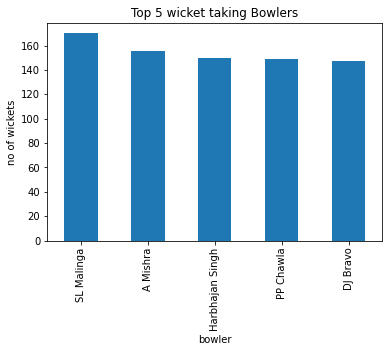

In [110]:
#top wicket takers
wicket=deli[deli.dismissal_kind!='run out'].groupby('bowler')
wicket.dismissal_kind.count().sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Top 5 wicket taking Bowlers')
plt.ylabel('no of wickets')

In [107]:
#Best bowling figures in ipl

top=deli[deli.dismissal_kind!='run out'].groupby(['match_id','bowler','batting_team','bowling_team'])
top.dismissal_kind.count().sort_values(ascending=False)[:20]


match_id  bowler           batting_team            bowling_team               
616       A Zampa          Sunrisers Hyderabad     Rising Pune Supergiants        6
83        Sohail Tanvir    Chennai Super Kings     Rajasthan Royals               6
11310     A Joseph         Sunrisers Hyderabad     Mumbai Indians                 6
119       A Kumble         Rajasthan Royals        Royal Challengers Bangalore    5
7918      AS Rajpoot       Sunrisers Hyderabad     Kings XI Punjab                5
98        A Mishra         Deccan Chargers         Delhi Daredevils               5
321       AD Mascarenhas   Pune Warriors           Kings XI Punjab                5
416       JP Faulkner      Sunrisers Hyderabad     Rajasthan Royals               5
19        B Kumar          Kings XI Punjab         Sunrisers Hyderabad            5
91        L Balaji         Kings XI Punjab         Chennai Super Kings            5
43        JD Unadkat       Sunrisers Hyderabad     Rising Pune Supergiant        

Text(0, 0.5, 'no of dismissals')

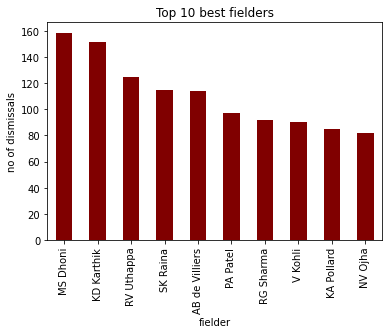

In [117]:
#top fielders
wicket=deli.groupby('fielder')
wicket.dismissal_kind.count().sort_values(ascending=False)[:10].plot(kind='bar',color='maroon')
plt.title('Top 10 best fielders')
plt.ylabel('no of dismissals')

Text(0.5, 1.0, 'Teams wins at different venues')

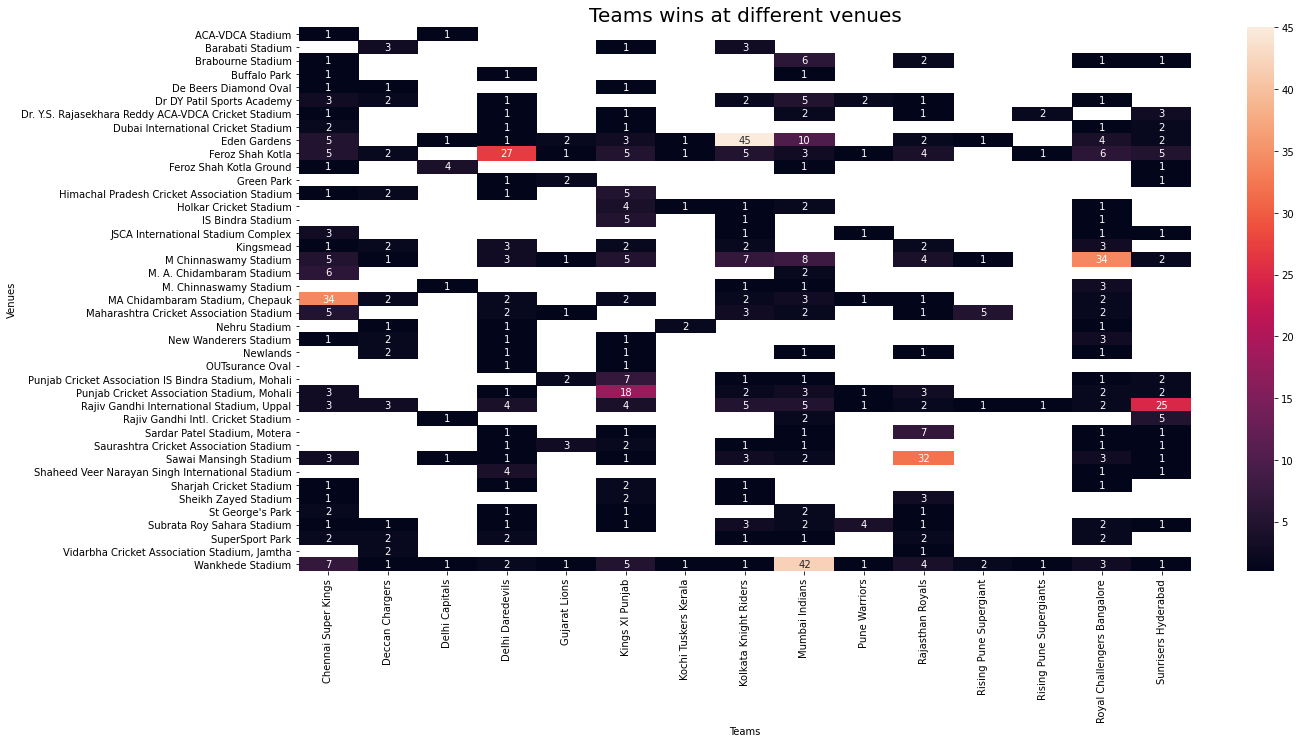

In [126]:
#Teams perfomace at different venues
venue_wins=match.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Match wins')
venue_wins_pvt=pd.pivot(venue_wins,values='Match wins',index='venue',columns='winner')
venue_wins_pvt.replace(np.NaN,0)
plt.figure(figsize=(20,10))
heat=sns.heatmap(venue_wins_pvt,annot=True)
plt.xlabel('Teams',size=10)
plt.ylabel('Venues',size=10)
plt.title('Teams wins at different venues',size=20)


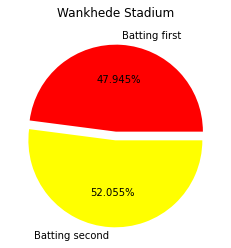

In [132]:
#toss decision venue wise
mum_sta=match.loc[(match['venue']=='Wankhede Stadium')]
mum_sta_win_by_runs=mum_sta[mum_sta['win_by_runs']>0]
slices=[len(mum_sta_win_by_runs),len(mum_sta)-len(mum_sta_win_by_runs)]
labels=['Batting first','Batting second']
plt.pie(slices,labels=labels,startangle=0,explode=(0,0.1),colors=['red','yellow'],autopct='%2.3f%%')
plt.title('Wankhede Stadium')
plt.show()

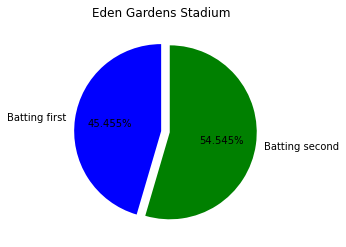

In [133]:
#toss decision venue wise
kol_sta=match.loc[(match['venue']=='Eden Gardens')]
kol_sta_win_by_runs=mum_sta[mum_sta['win_by_runs']>0]
slices=[len(kol_sta_win_by_runs),len(kol_sta)-len(kol_sta_win_by_runs)]
labels=['Batting first','Batting second']
plt.pie(slices,labels=labels,startangle=90,explode=(0,0.1),colors=['blue','green'],autopct='%2.3f%%')
plt.title('Eden Gardens Stadium')
plt.show()

In [147]:
#Matches won/loss after winning toss

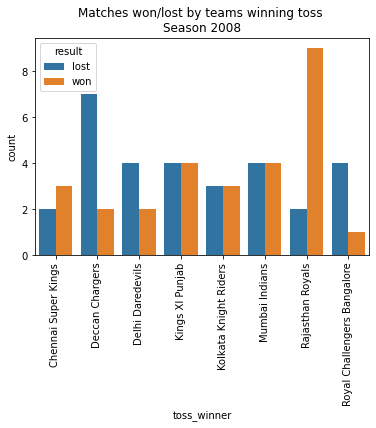

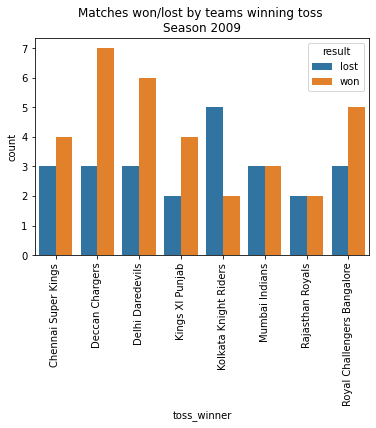

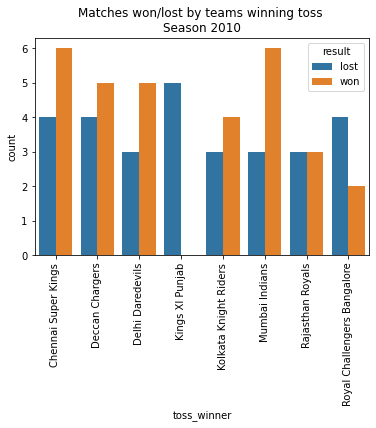

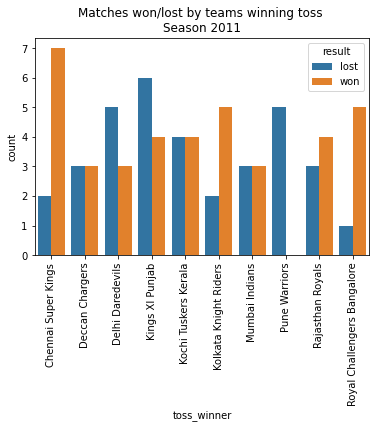

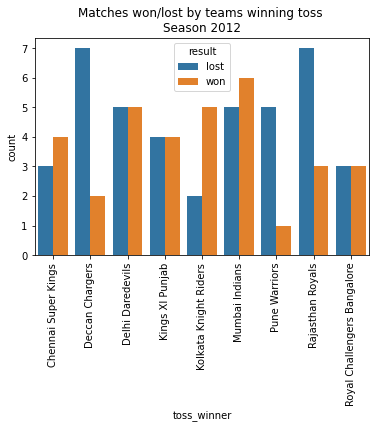

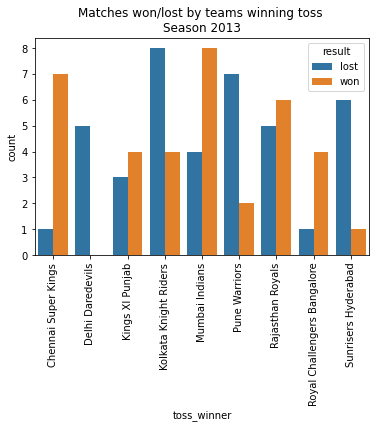

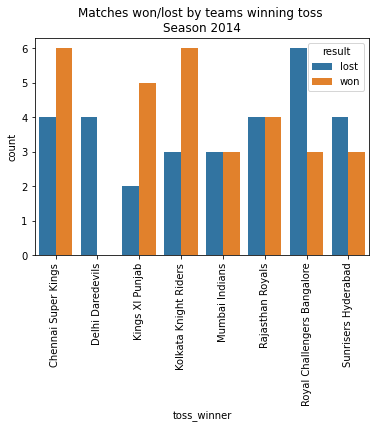

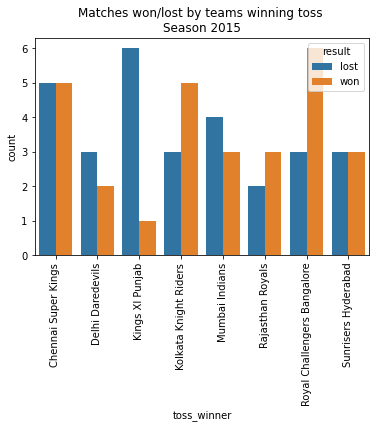

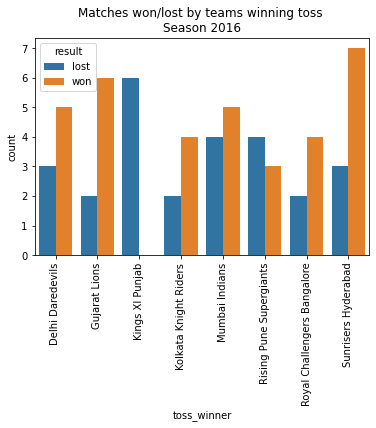

In [146]:

import numpy as np
toss = match.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2017, 1):
    toss_result_x = toss_result[toss_result['season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(x))
    plt.xticks(rotation=90)
    plt.show()
    x+=1

# Conclusion:
1)Most run scoring batsmen:Virat Kohli
2)Most wicket ticket bowler:Lasith Malinga
3)Most successfull team:Mumbai Indians
4)Most efficient fielder:Suresh Raina
5)Most efficient wicket keeper:M.S Dhoni
6)Most sixes:Chris Gayle
7)Most fours:Shikhar Dhawan
8)Highest batting score:175 by C.Gayle
9)Venues and Toss winning impacts on win or loss of team
10)Teams perform differently on different venues

